In [1]:
# Imports
import os, sys, types
import pathlib
from importlib import reload
import pickle 

import numpy as np

In [2]:
from functools import partial

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [4]:
# Local package imports
# Update this with setup & develop later
PROJECT_PATH = str(pathlib.Path().resolve().parent)
sys.path.append(PROJECT_PATH)

In [5]:
# Cool reloading
# Reference: https://stackoverflow.com/questions/28101895/reloading-packages-and-their-submodules-recursively-in-python

def reload_package(package):
    assert(hasattr(package, "__package__"))
    fn = package.__file__
    fn_dir = os.path.dirname(fn) + os.sep
    module_visit = {fn}
    del fn

    def reload_recursive_ex(module):
        reload(module)

        for module_child in vars(module).values():
            if isinstance(module_child, types.ModuleType):
                fn_child = getattr(module_child, "__file__", None)
                if (fn_child is not None) and fn_child.startswith(fn_dir):
                    if fn_child not in module_visit:
                        # print("reloading:", fn_child, "from", module)
                        module_visit.add(fn_child)
                        reload_recursive_ex(module_child)

    return reload_recursive_ex(package)

In [7]:
import hiddenbcd

# Numerical Experiments -- HBCD

## Trends of sequential and multi-shot protocol

In [8]:
# Sequential Protocol
theta1_array = np.linspace(0.025, np.pi / 4, 64)
theta1_array = np.flip(theta1_array)    # Go in ascending order of difficulty

delta_squared_array = [0.01, 0.0025, 0.0001]
delta_array = [0.1, 0.05, 0.01]
epsilon_array = [0.05, 0.025, 0.005]

N_array_plot = []
theta1_array_plot = []

for ind in range(len(delta_squared_array)):
    pickle_filename = 'sequential_results/solutions_hcd_delta_%f.pickle' % delta_squared_array[ind]
    with open(pickle_filename, 'rb') as handle:
        ds = pickle.load(handle)
        
    N_array_plot.append(ds[0])
    theta1_array_plot.append(theta1_array)

depth_array_plot = [None, None, None]

# Multi-shot protocol
theta1_array = np.linspace(0.025, np.pi / 4, 64)
theta1_array = np.flip(theta1_array)    # Go in ascending order of difficulty

depth_M = [4,4]
epsilon_M = [0.025, 0.005]
type_estimator = 'lrt'
experiment_M = [21,31]

for ind in range(len(depth_M)):
    depth = depth_M[ind]
    epsilon = epsilon_M[ind]
    experiment_number = experiment_M[ind]
    
    pickle_filename = 'multishot_results/solutions_hcd_multishot_est_%s_d_%d_epsilon_%f_expt_%d.pickle' % (type_estimator, 
                                                                                         depth, epsilon, 
                                                                                         experiment_number)
    with open(pickle_filename, 'rb') as handle:
        ds = pickle.load(handle)
        
    N_array_plot.append(ds[1])
    theta1_array_plot.append(theta1_array)
    epsilon_array.append(epsilon)
    depth_array_plot.append(depth)

In [9]:
epsilon_array

[0.05, 0.025, 0.005, 0.025, 0.005]

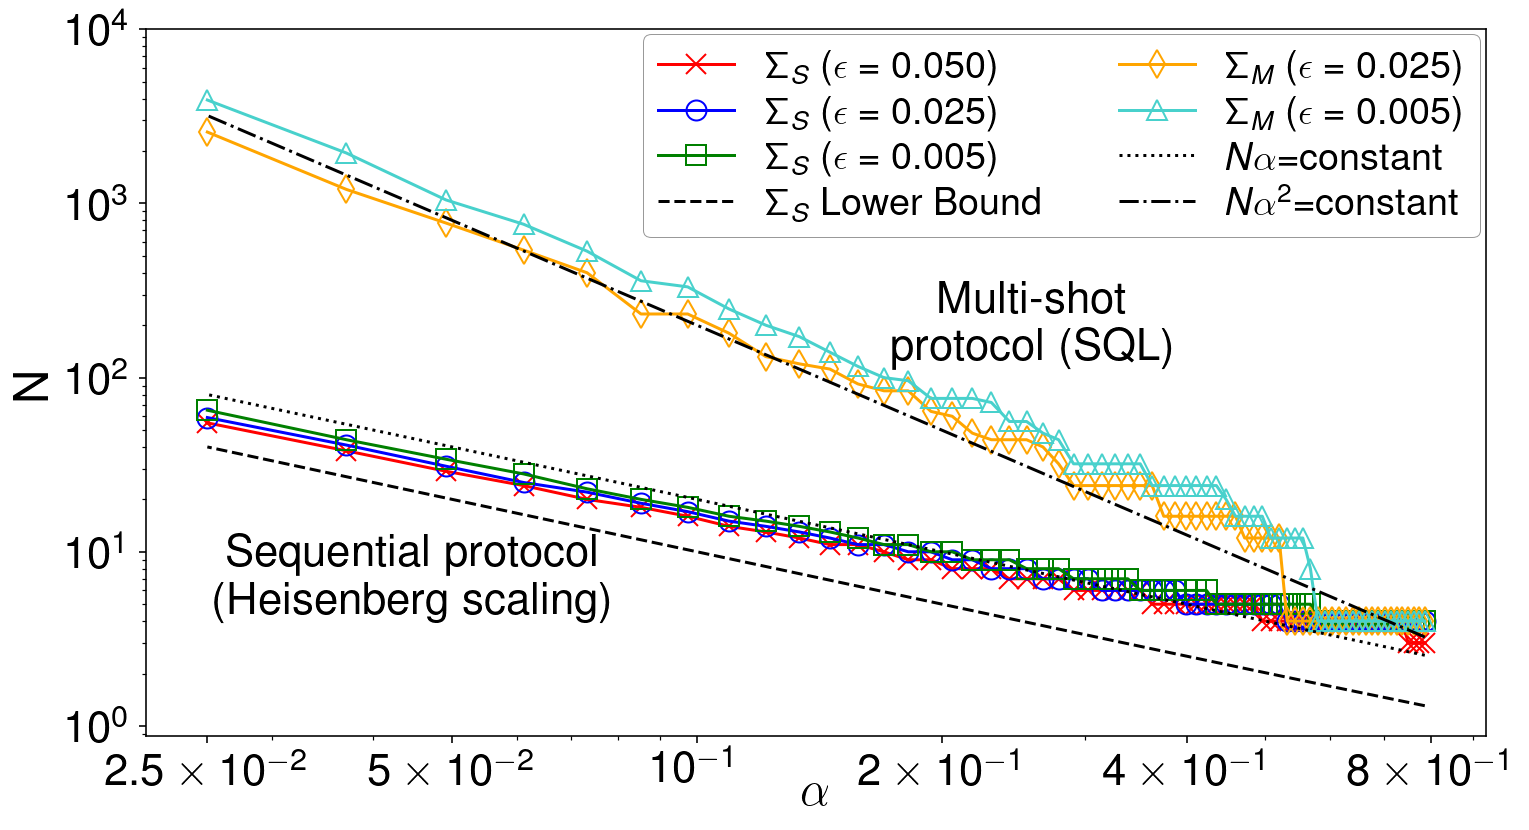

In [12]:
hiddenbcd.utils_experiments.plot_hbcd_trends_paper(epsilon_array, theta1_array_plot, N_array_plot, 
                                               depth_array_plot=depth_array_plot,
                                               FLAG_monotonic=True,
                                               savefile='numerical_bounds_N_hbcd_seq_multishot_final_v5.pdf')

# Prob of Success with N

In [18]:
# Load from pickle file
pickle_filename = 'prob_trend_with_N_hbcd_alpha_0_1.pickle'
with open(pickle_filename, 'rb') as handle:
    ds = pickle.load(handle)

In [19]:
ds.keys()

dict_keys(['phi_opt', 'N', 'p0_theta0', 'p0_theta1', 'p_error', 'p_success', 'alpha'])

0.1


Text(0, 0.5, '$p_{y|\\theta_V}(1|\\alpha)$')

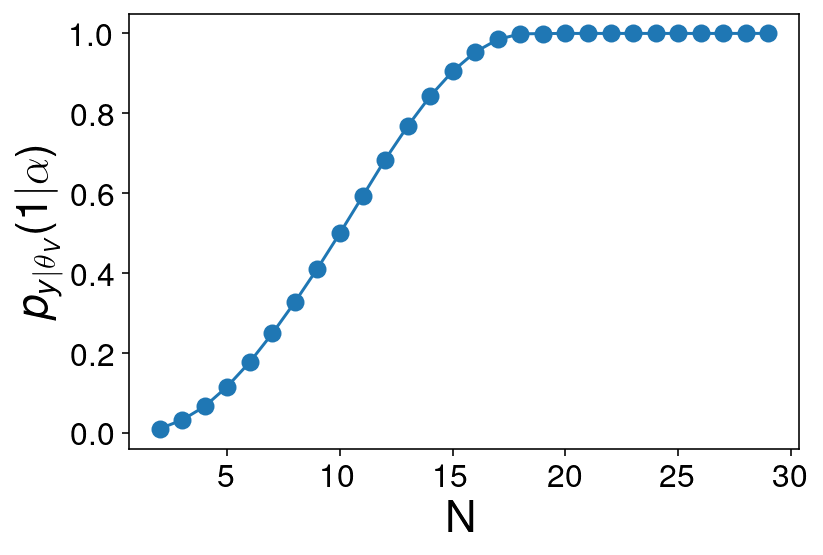

In [20]:
print(ds['alpha'])
plt.plot(ds['N'], ds['p0_theta1'], '-o', markersize=8)
plt.xlabel('N')
plt.ylabel(r'$p_{y|\theta_V}(1|\alpha)$')

# savefile = 'prob_target_vs_N_alpha_0_1.png'
# plt.savefig(savefile, bbox_inches='tight', pad_inches=0, dpi=300)

0.1


Text(0, 0.5, 'P(success)')

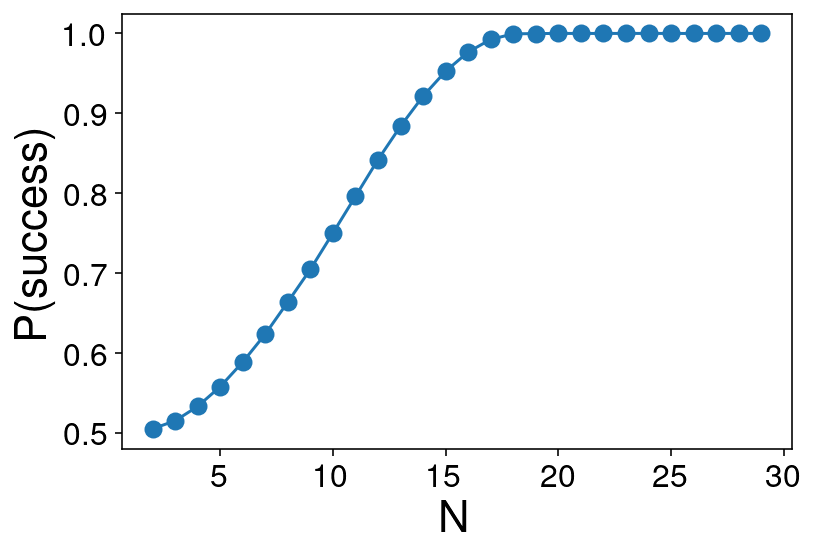

In [21]:
print(ds['alpha'])
plt.plot(ds['N'], ds['p_success'], '-o', markersize=8)
plt.xlabel('N')
plt.ylabel('P(success)')

# savefile = 'prob_success_vs_N_alpha_0_1.png'
# plt.savefig(savefile, bbox_inches='tight', pad_inches=0, dpi=300)

# QDOC -- Quantum Detector Operating Characteristics

In [22]:
from scipy.stats import binom as scp_binom
import math

## Dataset of interest

In [23]:
# Load from pickle file
pickle_filename = 'prob_trend_with_N_hbcd_alpha_0_1.pickle'
with open(pickle_filename, 'rb') as handle:
    ds = pickle.load(handle)

## Sequential Protocol

In [24]:
# for sequential case, we have only one value
ind = 14
print(ds['N'][ind])
p_d = ds['p0_theta1'][ind]
p_f = ds['p0_theta0'][ind]

16


4
8
16


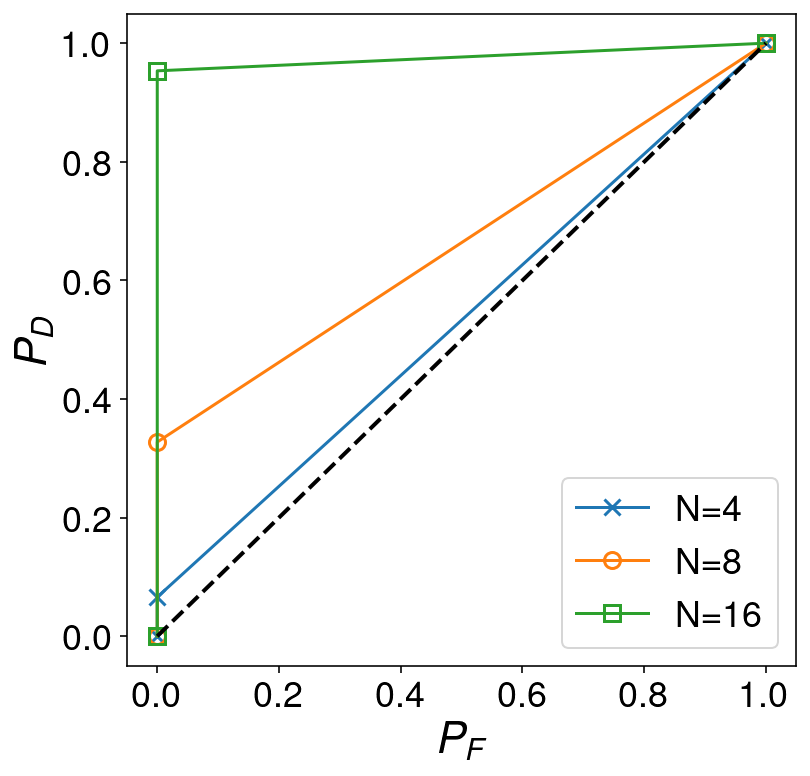

In [26]:
marker_style = ['-x', '-o', '-s', '-d', '-p']

# To force xlabels and ylabels to use the right defined Font
# Ref: https://stackoverflow.com/questions/11611374/sans-serif-font-for-axes-tick-labels-with-latex
from matplotlib import rc
rc('text.latex', preamble=r'\usepackage{sfmath}')

plt.figure(figsize=(6,6))
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['font.sans-serif'] = "Helvetica"
plt.rcParams['figure.titlesize'] = 22
plt.rcParams['axes.labelsize'] = 22
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['text.usetex'] = True

counter = 0
for ind in [2,6,14]:
    print(ds['N'][ind])
    p_d = ds['p0_theta1'][ind]
    p_f = ds['p0_theta0'][ind]
    
    label_plot = 'N=%d' % ds['N'][ind]
    plt.plot([0,p_f,1],[0,p_d,1], marker_style[counter], markersize=8, markeredgewidth=1.5,
             mfc='none', lw=1.5, label=label_plot)
    
    counter += 1
    
plt.plot([0, 1], [0, 1], color="k", lw=2, linestyle="--")
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel(r"$P_F$")
plt.ylabel(r"$P_D$")
plt.legend(loc="lower right")

savefile = 'qdoc_sequential_alpha_0_1.pdf'
plt.savefig(savefile, bbox_inches='tight', pad_inches=0, dpi=300)
plt.show()

## Multishot protocol - fixed d, increasing m

For the multishot case, we now have extra cases because of m shots being made

In [27]:
def compute_qdoc(m, d, p1_alpha, p0_alpha, p1_0, p0_0, FLAG_compute_prob=True):
    print('n_shots=%d' %m)
    print('query depth=%d' %d)
    
    FLAG_compute_prob = True
    # Operating points (op)
    # Remember log() is monotonically increasing so we are good!
    log_eta_op = []
    eta_op = []

    if FLAG_compute_prob:
        prob_D = []
        prob_F = []

    for Y1 in range(m+1):
        print(Y1)
        Y0 = m - Y1

        # Compute log of the ratio of likelihoods
        log_eta_temp = Y1*np.log(p1_alpha/p1_0) + Y0*np.log(p0_alpha/p0_0)
        log_eta_op.append(log_eta_temp)
        eta_op.append(np.exp(log_eta_temp))

        if FLAG_compute_prob:
    #         low_m = Y1 - 1

    #         # Compute corresponding probability of detection and false-rate alarm
    #         pd_temp = 1.0 - scp_binom.cdf(low_m, m, p1_alpha)
    #         pf_temp = 1.0 - scp_binom.cdf(low_m, m, p1_0)

            pd_temp = 0
            pf_temp = 0
            for ind in range(Y1, m+1):
                pd_temp += math.comb(m, ind) * ((p1_alpha)**(ind)) * ((p0_alpha)**(m - ind))
                pf_temp += math.comb(m, ind) * ((p1_0)**(ind)) * ((p0_0)**(m - ind))

            # Update arrays
            prob_D.append(pd_temp)
            prob_F.append(pf_temp)
    
    # Prepend and append additional points for eta = 0 (log_eta=-np.inf) and eta = inf (log_eta=np.inf)
    log_eta_op.append(np.inf)
    log_eta_op.insert(0, -np.inf)
    
    eta_op.append(np.inf)
    eta_op.insert(0, 0.0)
    
    if FLAG_compute_prob:
        prob_D.append(0.0)
        prob_D.insert(0, 1.0)
        
        prob_F.append(0.0)
        prob_F.insert(0, 1.0)
    
    if FLAG_compute_prob:
        return log_eta_op, prob_D, prob_F
    else:
        return log_eta_op

In [28]:
# Let's bring out d = 8 and set m = 2
ind = 6
d = ds['N'][ind]
m = 8

# Relabeling things for the sake of seeing how it goes along with my notes
p1_alpha = ds['p0_theta1'][ind]
p0_alpha = 1 - p1_alpha
p1_0 = ds['p0_theta0'][ind]
p0_0 = 1 - p1_0

In [30]:
log_eta_op, prob_D, prob_F = compute_qdoc(m, d, p1_alpha, p0_alpha, p1_0, p0_0)

n_shots=8
query depth=8
0
1
2
3
4
5
6
7
8


In [31]:
log_eta_op

[-inf,
 -3.172025783981461,
 19.0347275401983,
 41.24148086437806,
 63.44823418855782,
 85.65498751273758,
 107.86174083691733,
 130.0684941610971,
 152.27524748527685,
 174.48200080945662,
 inf]

In [32]:
prob_D

[1.0,
 1.0,
 0.9580814062203404,
 0.7948949264652473,
 0.5169621921220864,
 0.24646847777797748,
 0.08193485044053066,
 0.017882932125554286,
 0.0022985486084155645,
 0.00013179731398743074,
 0.0]

In [33]:
prob_F

[1.0,
 0.9999999999999998,
 8.830942131706308e-10,
 3.411867329472493e-19,
 7.532500740025815e-29,
 1.039360596436584e-38,
 9.17853328536262e-49,
 5.065943520957721e-59,
 1.5977519320535424e-69,
 2.2046335718126455e-80,
 0.0]

8
n_shots=1
query depth=8
0
1
n_shots=2
query depth=8
0
1
2
n_shots=4
query depth=8
0
1
2
3
4
n_shots=8
query depth=8
0
1
2
3
4
5
6
7
8


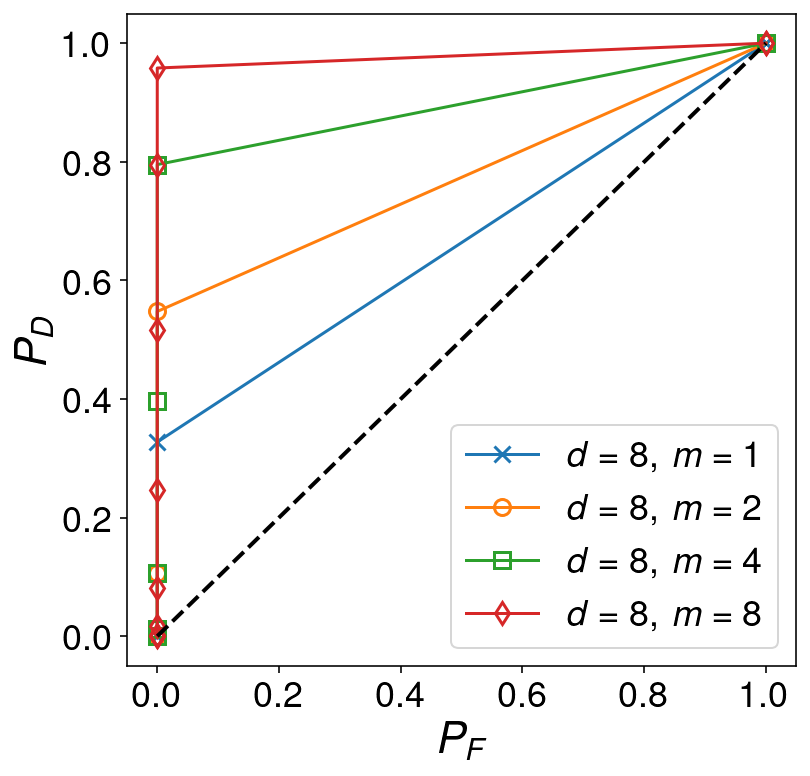

In [35]:
marker_style = ['-x', '-o', '-s', '-d', '-p']

plt.figure(figsize=(6,6))
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['font.sans-serif'] = "Helvetica"
plt.rcParams['figure.titlesize'] = 22
plt.rcParams['axes.labelsize'] = 22
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['text.usetex'] = True

# Fix depth
d = 8

# Extract corresponding data -- note relabeling
ind = 6
print(ds['N'][ind])

assert d == ds['N'][ind]

p1_alpha = ds['p0_theta1'][ind]
p0_alpha = 1 - p1_alpha
p1_0 = ds['p0_theta0'][ind]
p0_0 = 1 - p1_0

# Array of shots
#shots_array = [2,4,8,16]
shots_array = [1,2,4,8]

counter = 0
for m in shots_array:
    # Get corresponding ROC
    _, prob_D, prob_F = compute_qdoc(m, d, p1_alpha, p0_alpha, p1_0, p0_0)
    
    label_plot = r'$d=%d, \, m=%d$' % (d, m)
    
    plt.plot(prob_F, prob_D, marker_style[counter], markersize=8, markeredgewidth=1.5,
             mfc='none', lw=1.5, label=label_plot)

    counter += 1
    
plt.plot([0, 1], [0, 1], color="k", lw=2, linestyle="--")
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel(r"$P_F$")
plt.ylabel(r"$P_D$")
plt.legend(loc="lower right")

savefile = 'qdoc_multishot_alpha_0_1.pdf'
plt.savefig(savefile, bbox_inches='tight', pad_inches=0, dpi=300)
plt.show()

In [36]:
import copy

8
n_shots=1
query depth=8
0
1
[0.32733189138426744]
[1.1038677668897721e-10]
n_shots=2
query depth=8
0
1
2
[0.5475176156513331, 0.10714616711720186]
[2.2077355336576917e-10, 1.2185240467782121e-20]
n_shots=4
query depth=8
0
1
2
3
4
[0.7952596918541452, 0.3967390457905453, 0.1058485267644719, 0.011480301127907348]
[4.4154710668279733e-10, 7.311144279593202e-20, 5.380357673228772e-30, 1.4848008525767506e-40]
n_shots=8
query depth=8
0
1
2
3
4
5
6
7
8
[0.9580814062203404, 0.7948949264652473, 0.5169621921220864, 0.24646847777797748, 0.08193485044053066, 0.017882932125554286, 0.0022985486084155645, 0.00013179731398743074]
[8.830942131706308e-10, 3.411867329472493e-19, 7.532500740025815e-29, 1.039360596436584e-38, 9.17853328536262e-49, 5.065943520957721e-59, 1.5977519320535424e-69, 2.2046335718126455e-80]


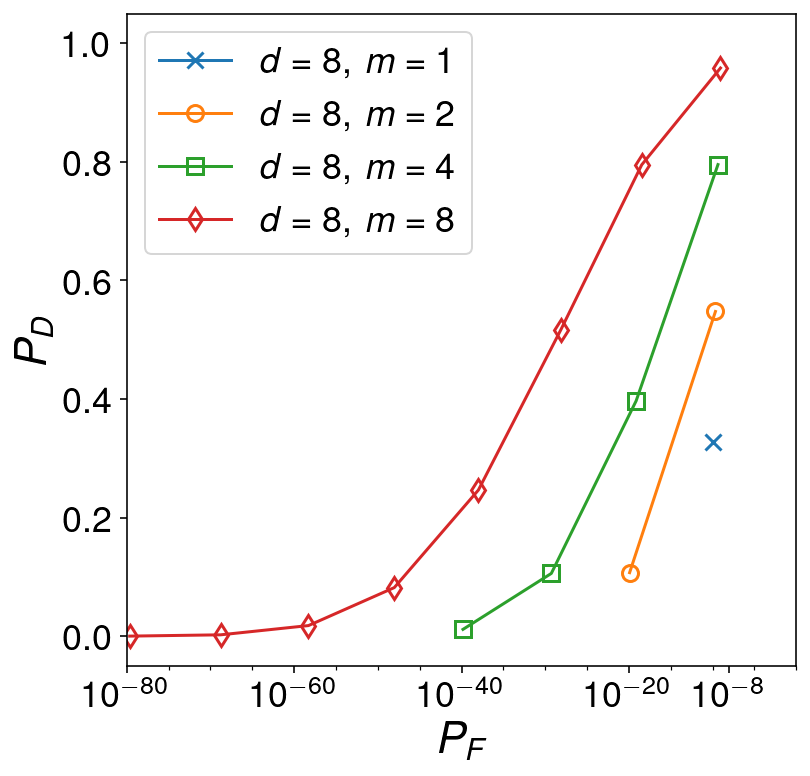

In [37]:
marker_style = ['-x', '-o', '-s', '-d', '-p']

plt.figure(figsize=(6,6))
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['font.sans-serif'] = "Helvetica"
plt.rcParams['figure.titlesize'] = 22
plt.rcParams['axes.labelsize'] = 22
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['text.usetex'] = True

# Fix depth
d = 8

# Extract corresponding data -- note relabeling
ind = 6
print(ds['N'][ind])

assert d == ds['N'][ind]

p1_alpha = ds['p0_theta1'][ind]
p0_alpha = 1 - p1_alpha
p1_0 = ds['p0_theta0'][ind]
p0_0 = 1 - p1_0

# Array of shots
#shots_array = [2,4,8,16]
shots_array = [1,2,4,8]

counter = 0
for m in shots_array:
    # Get corresponding ROC
    _, prob_D, prob_F = compute_qdoc(m, d, p1_alpha, p0_alpha, p1_0, p0_0)
    
    label_plot = r'$d=%d, \, m=%d$' % (d, m)
        
    # Only plot intermediate points
    plt_pD = copy.deepcopy(prob_D[2:-1])
    plt_pF = copy.deepcopy(prob_F[2:-1])
    
    print(plt_pD)
    print(plt_pF)
    plt.plot(plt_pF, plt_pD, marker_style[counter], markersize=8, markeredgewidth=1.5,
             mfc='none', lw=1.5, label=label_plot)

    counter += 1
    
plt.xscale('symlog', linthresh=1e-80)
plt.xlim([1e-80, 1.05])
plt.ylim([-0.05, 1.05])

# Tick-marks
plt.xticks([1e-80,1e-60,1e-40,1e-20,1e-8])
plt.gca().set_xticklabels([r'$10^{-80}$', r'$10^{-60}$', r'$10^{-40}$', r'$10^{-20}$',
                           r'$10^{-8}$'])

plt.xlabel(r"$P_F$")
plt.ylabel(r"$P_D$")
plt.legend(loc="best")

savefile = 'intermediate_qdoc_multishot_alpha_0_1.pdf'
plt.savefig(savefile, bbox_inches='tight', pad_inches=0, dpi=300)
plt.show()

## Fixed Experimental Budget -- multishot vs sequential protocols

2
n_shots=8
query depth=2
0
1
2
3
4
5
6
7
8
4
n_shots=4
query depth=4
0
1
2
3
4
8
n_shots=2
query depth=8
0
1
2
16
n_shots=1
query depth=16
0
1


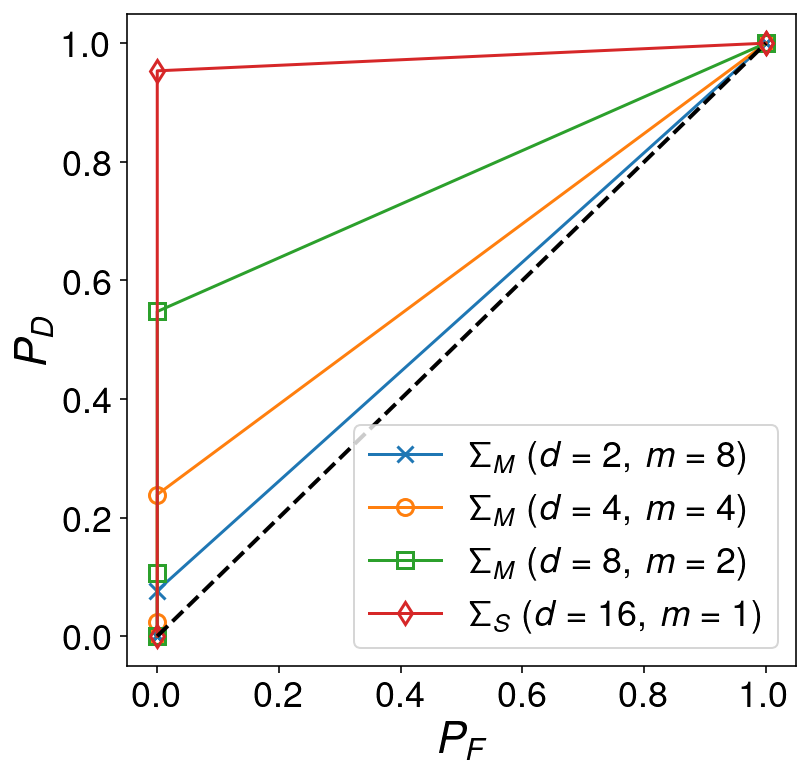

In [39]:
# Fixing budget to N=16
d_array = [2,4,8,16]
m_array = [8,4,2,1]

marker_style = ['-x', '-o', '-s', '-d', '-p']

# To force xlabels and ylabels to use the right defined Font
# Ref: https://stackoverflow.com/questions/11611374/sans-serif-font-for-axes-tick-labels-with-latex
from matplotlib import rc
rc('text.latex', preamble=r'\usepackage{sfmath}')

plt.figure(figsize=(6,6))
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['font.sans-serif'] = "Helvetica"
plt.rcParams['figure.titlesize'] = 22
plt.rcParams['axes.labelsize'] = 22
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['text.usetex'] = True

counter = 0
for k in range(len(d_array)):
    d = d_array[k]
    m = m_array[k]
    
    # Extract corresponding data -- note relabeling
    ind_data = d - 2
    print(ds['N'][ind_data])
    assert d == ds['N'][ind_data]

    p1_alpha = ds['p0_theta1'][ind_data]
    p0_alpha = 1 - p1_alpha
    p1_0 = ds['p0_theta0'][ind_data]
    p0_0 = 1 - p1_0
    
    # Get ROC
    _, prob_D, prob_F = compute_qdoc(m, d, p1_alpha, p0_alpha, p1_0, p0_0)
    
    if m == 1:
        label_plot = r'$\Sigma_S$ ($d=%d, \, m=%d$)' % (d, m)
    else:
        label_plot = r'$\Sigma_M$ ($d=%d, \, m=%d$)' % (d, m)
    
    plt.plot(prob_F, prob_D, marker_style[counter], markersize=8, markeredgewidth=1.5,
             mfc='none', lw=1.5, label=label_plot)

    counter += 1

plt.plot([0, 1], [0, 1], color="k", lw=2, linestyle="--")
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel(r"$P_F$")
plt.ylabel(r"$P_D$")
plt.legend(loc="lower right")

savefile = 'qdoc_fixed_budget_N_16_alpha_0_1.pdf'
plt.savefig(savefile, bbox_inches='tight', pad_inches=0, dpi=300)
plt.show()

2
n_shots=8
query depth=2
0
1
2
3
4
5
6
7
8
[0.07700705676529715, 0.002672554305123969, 5.340320031868359e-05, 6.689687975314602e-07, 5.371351534445473e-09, 2.6978498487565042e-11, 7.747276051376005e-14, 9.736770891922985e-17]
[4.376778202821865e-12, 8.380832003568517e-24, 9.170260708701464e-36, 6.27128081001989e-48, 2.7448005153133183e-60, 7.508364416591078e-73, 1.1736587756234703e-85, 8.02631897923703e-99]
4
n_shots=4
query depth=4
0
1
2
3
4
[0.23880255826318955, 0.023852177782742328, 0.0010901796128258547, 1.8906927000040662e-05]
[6.9513551554643345e-12, 1.8120501936577706e-23, 2.0993674092814487e-35, 9.120905289862165e-48]
8
n_shots=2
query depth=8
0
1
2
[0.5475176156513331, 0.10714616711720186]
[2.2077355336576917e-10, 1.2185240467782121e-20]
16
n_shots=1
query depth=16
0
1
[0.9533448175784611]
[8.845491327851492e-09]


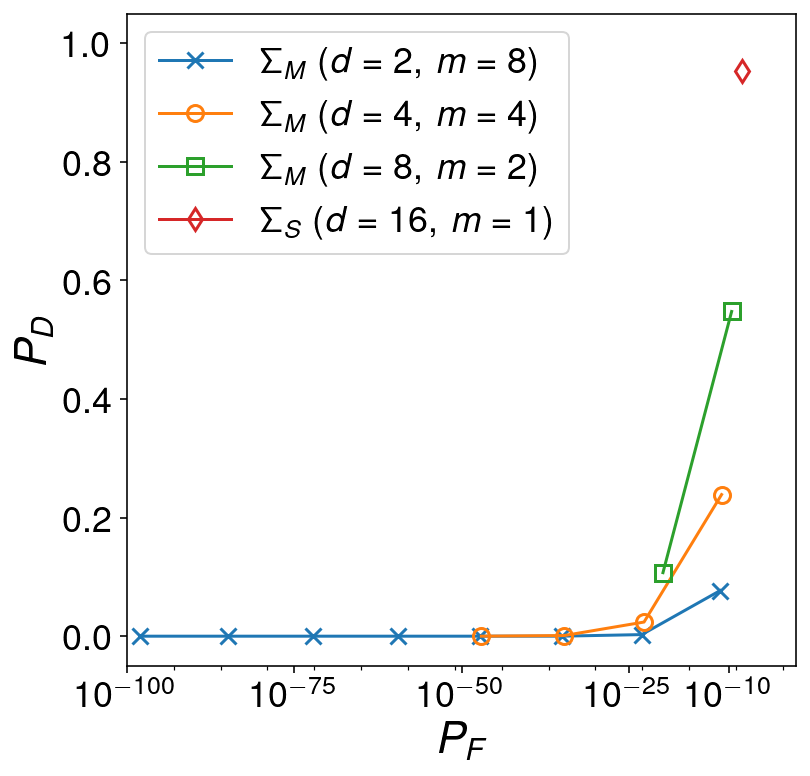

In [40]:
# Fixing budget to N=16
d_array = [2,4,8,16]
m_array = [8,4,2,1]

marker_style = ['-x', '-o', '-s', '-d', '-p']

# To force xlabels and ylabels to use the right defined Font
# Ref: https://stackoverflow.com/questions/11611374/sans-serif-font-for-axes-tick-labels-with-latex
from matplotlib import rc
rc('text.latex', preamble=r'\usepackage{sfmath}')

plt.figure(figsize=(6,6))
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['font.sans-serif'] = "Helvetica"
plt.rcParams['figure.titlesize'] = 22
plt.rcParams['axes.labelsize'] = 22
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['text.usetex'] = True

counter = 0
for k in range(len(d_array)):
    d = d_array[k]
    m = m_array[k]
    
    # Extract corresponding data -- note relabeling
    ind_data = d - 2
    print(ds['N'][ind_data])
    assert d == ds['N'][ind_data]

    p1_alpha = ds['p0_theta1'][ind_data]
    p0_alpha = 1 - p1_alpha
    p1_0 = ds['p0_theta0'][ind_data]
    p0_0 = 1 - p1_0
    
    # Get ROC
    _, prob_D, prob_F = compute_qdoc(m, d, p1_alpha, p0_alpha, p1_0, p0_0)
    
    if m == 1:
        label_plot = r'$\Sigma_S$ ($d=%d, \, m=%d$)' % (d, m)
    else:
        label_plot = r'$\Sigma_M$ ($d=%d, \, m=%d$)' % (d, m)
    
    # Only plot intermediate points
    plt_pF = copy.deepcopy(prob_F[2:-1])
    plt_pD = copy.deepcopy(prob_D[2:-1])
    
    print(plt_pD)
    print(plt_pF)
    
    plt.plot(plt_pF, plt_pD, marker_style[counter], markersize=8, markeredgewidth=1.5,
             mfc='none', lw=1.5, label=label_plot)

    counter += 1

plt.xscale('symlog', linthresh=1e-100)
#plt.yscale('symlog', linthresh=1e-16)
plt.xlim([1e-100, 1.05])
plt.ylim([-0.05, 1.05])

# Tick-marks
plt.xticks([1e-100,1e-75,1e-50,1e-25,1e-10])
plt.gca().set_xticklabels([r'$10^{-100}$', r'$10^{-75}$', r'$10^{-50}$', r'$10^{-25}$',
                           r'$10^{-10}$'])

# plt.yticks([1e-16,1e-12,1e-8,1e-4,1e-2,1e0])
# plt.gca().set_yticklabels([r'$10^{-16}$', r'$10^{-12}$', r'$10^{-8}$', r'$10^{-4}$', r'$10^{-2}$',
#                            r'$1$'])

plt.xlabel(r"$P_F$")
plt.ylabel(r"$P_D$")
plt.legend(loc="best")

savefile = 'intermediate_qdoc_fixed_budget_N_16_alpha_0_1.pdf'
plt.savefig(savefile, bbox_inches='tight', pad_inches=0, dpi=300)
plt.show()

## QDOC for experimental proposal

In [41]:
# Load from pickle file
pickle_filename = 'prob_trend_with_N_hbcd_alpha_0_25.pickle'
with open(pickle_filename, 'rb') as handle:
    ds = pickle.load(handle)

4
6
8


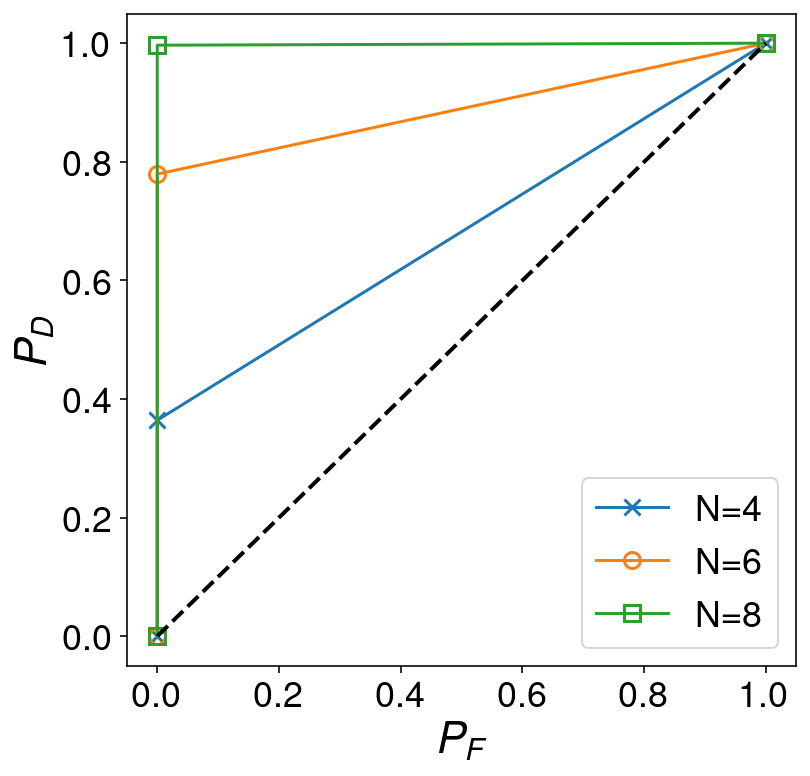

In [42]:
marker_style = ['-x', '-o', '-s', '-d', '-p']

# To force xlabels and ylabels to use the right defined Font
# Ref: https://stackoverflow.com/questions/11611374/sans-serif-font-for-axes-tick-labels-with-latex
from matplotlib import rc
rc('text.latex', preamble=r'\usepackage{sfmath}')

plt.figure(figsize=(6,6))
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['font.sans-serif'] = "Helvetica"
plt.rcParams['figure.titlesize'] = 22
plt.rcParams['axes.labelsize'] = 22
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['text.usetex'] = True

counter = 0
for ind in [2,4,6]:
    print(ds['N'][ind])
    p_d = ds['p0_theta1'][ind]
    p_f = ds['p0_theta0'][ind]
    
    label_plot = 'N=%d' % ds['N'][ind]
    plt.plot([0,p_f,1],[0,p_d,1], marker_style[counter], markersize=8, markeredgewidth=1.5,
             mfc='none', lw=1.5, label=label_plot)
    
    counter += 1
    
plt.plot([0, 1], [0, 1], color="k", lw=2, linestyle="--")
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel(r"$P_F$")
plt.ylabel(r"$P_D$")
plt.legend(loc="lower right")

plt.show()

2
n_shots=4
query depth=2
0
1
2
3
4
4
n_shots=2
query depth=4
0
1
2
8
n_shots=1
query depth=8
0
1


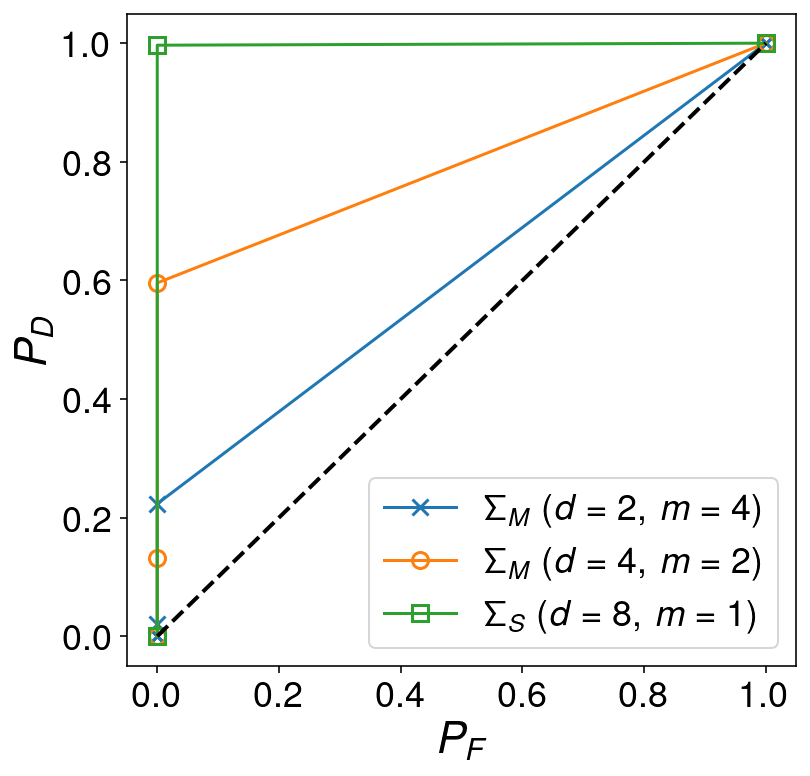

In [43]:
# Fixing budget to N=8
d_array = [2,4,8]
m_array = [4,2,1]

marker_style = ['-x', '-o', '-s', '-d', '-p']

# To force xlabels and ylabels to use the right defined Font
# Ref: https://stackoverflow.com/questions/11611374/sans-serif-font-for-axes-tick-labels-with-latex
from matplotlib import rc
rc('text.latex', preamble=r'\usepackage{sfmath}')

plt.figure(figsize=(6,6))
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['font.sans-serif'] = "Helvetica"
plt.rcParams['figure.titlesize'] = 22
plt.rcParams['axes.labelsize'] = 22
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['text.usetex'] = True

counter = 0
for k in range(len(d_array)):
    d = d_array[k]
    m = m_array[k]
    
    # Extract corresponding data -- note relabeling
    ind_data = d - 2
    print(ds['N'][ind_data])
    assert d == ds['N'][ind_data]

    p1_alpha = ds['p0_theta1'][ind_data]
    p0_alpha = 1 - p1_alpha
    p1_0 = ds['p0_theta0'][ind_data]
    p0_0 = 1 - p1_0
    
    # Get ROC
    _, prob_D, prob_F = compute_qdoc(m, d, p1_alpha, p0_alpha, p1_0, p0_0)
    
    if m == 1:
        label_plot = r'$\Sigma_S$ ($d=%d, \, m=%d$)' % (d, m)
    else:
        label_plot = r'$\Sigma_M$ ($d=%d, \, m=%d$)' % (d, m)
    
    plt.plot(prob_F, prob_D, marker_style[counter], markersize=8, markeredgewidth=1.5,
             mfc='none', lw=1.5, label=label_plot)

    counter += 1

plt.plot([0, 1], [0, 1], color="k", lw=2, linestyle="--")
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel(r"$P_F$")
plt.ylabel(r"$P_D$")
plt.legend(loc="lower right")

savefile = 'qdoc_fixed_budget_N_8_alpha_0_25.pdf'
plt.savefig(savefile, bbox_inches='tight', pad_inches=0, dpi=300)
plt.show()